In [ ]:
#GAIN COMPRESSION

In [37]:
def gain_compression_filter(audio, comp_th_db, lim_th_db):
    

    if(lim_th_db<comp_th_db):
        raise ValueError("lim_th_db must be greater than or equal to comp_th_db")

    comp_th_linear = 10**(comp_th_db / 20)
    lim_th_linear = 10 ** (lim_th_db / 20)

    #1D cubic spline interpolation
    x = np.array([comp_th_linear,lim_th_linear])
    y = np.array([comp_th_linear,lim_th_linear])
    cs = CubicSpline(x ,y ,bc_type="natural")

    output = np.zeros_like(audio)

    for i in range(len(audio)):
        sample = audio[i]
        abs_sample = abs(sample)
        sign = np.sign(sample)
    
        if abs_sample<=comp_th_linear:
            output[i] = sample
            
        elif abs_sample<lim_th_linear:
            interpolated = abs(cs(sample))
            output[i] = sign * interpolated 
            
        else:
            output[i] = sign * lim_th_linear   

    return output

=== Gain Compression Filter Test ===


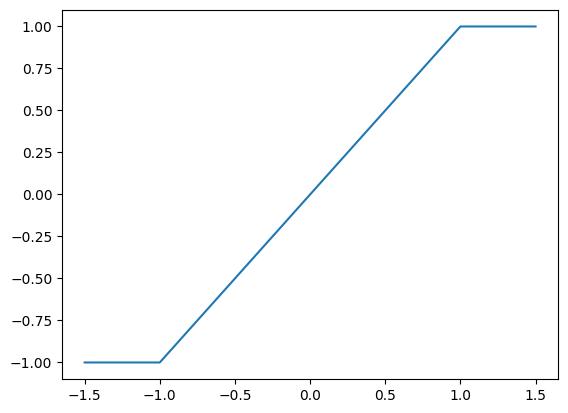

In [41]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def main():
    print("=== Gain Compression Filter Test ===")

    levels = np.linspace(-1.5, 1.5, 500)
    compressed = gain_compression_filter(levels, comp_th_db=-6, lim_th_db=0)
    plt.plot(levels, compressed)
    

    
if __name__ == "__main__":
    main()

    